# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   **Konteks:**
   Dataset ini berisi deskripsi sampel hipotetis yang sesuai dengan 23 spesies jamur insang (gilled mushrooms) dalam Keluarga Agaricus dan Lepiota. Setiap spesies diidentifikasi sebagai pasti dapat dimakan (edible), pasti beracun (poisonous), atau tidak diketahui kelayakannya untuk dimakan (dan digabungkan dengan kelas beracun).

   **Konten:**
   - **Jumlah Sampel:** 8124
   - **Jumlah Fitur:** 22 + 1 kolom kelas target
   - **Tipe Data:** Semua fitur bersifat kategorikal.
   - **Missing Values:** Tidak ada nilai yang hilang (missing values).

   **Tujuan:**
   Tujuan utama dari eksperimen ini adalah untuk membangun model klasifikasi yang dapat memprediksi secara akurat apakah jamur dapat dimakan ('e' = edible) atau beracun ('p' = poisonous) berdasarkan fitur-fitur fisiknya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# semua kolom ditampilkan saat menggunakan print(df.head())
pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
file_path = '../dataset_raw/mushrooms.csv'

# Memuat dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
print("Data Teratas:")
df.head()

Data Teratas:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk

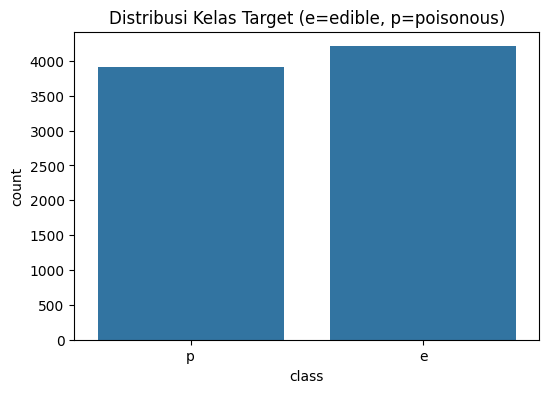



Jumlah Nilai Unik per Fitur:
- class: 2 nilai unik
- cap-shape: 6 nilai unik
- cap-surface: 4 nilai unik
- cap-color: 10 nilai unik
- bruises: 2 nilai unik
- odor: 9 nilai unik
- gill-attachment: 2 nilai unik
- gill-spacing: 2 nilai unik
- gill-size: 2 nilai unik
- gill-color: 12 nilai unik
- stalk-shape: 2 nilai unik
- stalk-root: 5 nilai unik
- stalk-surface-above-ring: 4 nilai unik
- stalk-surface-below-ring: 4 nilai unik
- stalk-color-above-ring: 9 nilai unik
- stalk-color-below-ring: 9 nilai unik
- veil-type: 1 nilai unik
- veil-color: 4 nilai unik
- ring-number: 3 nilai unik
- ring-type: 5 nilai unik
- spore-print-color: 9 nilai unik
- population: 6 nilai unik
- habitat: 7 nilai unik




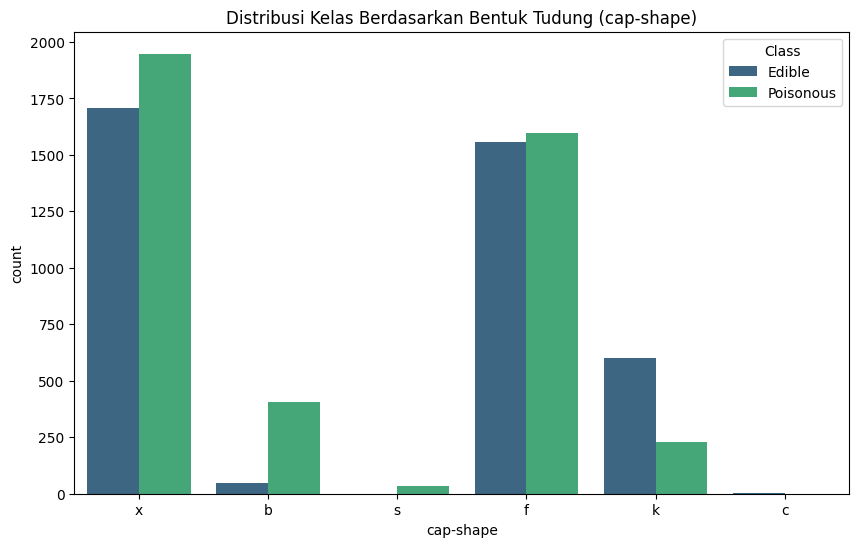

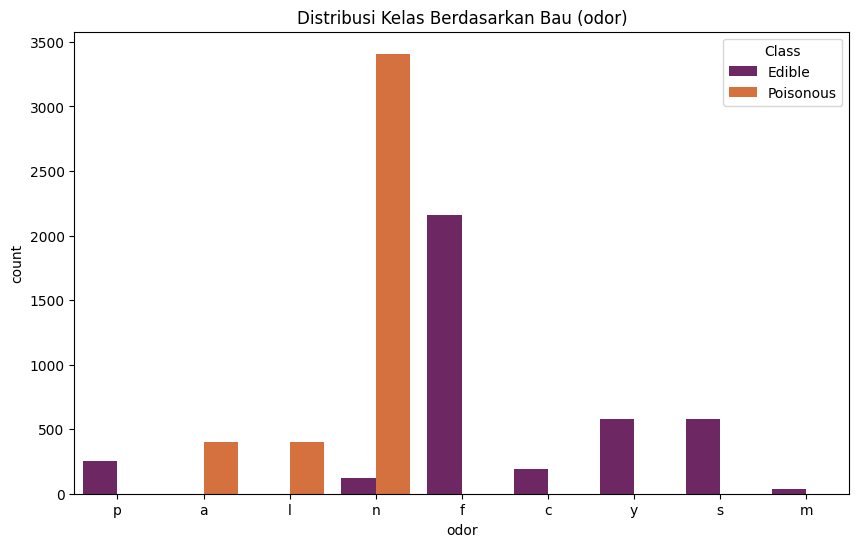

In [3]:
# Menampilkan informasi dasar dataset
print("Informasi Dataset:")
df.info()

print("\n" + "="*50 + "\n")

# Mengecek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())
print(f"\nTotal missing values di seluruh dataset: {df.isnull().sum().sum()}")


print("\n" + "="*50 + "\n")

# Menampilkan statistik deskriptif. 
print("Statistik Deskriptif untuk Data Kategorikal:")
df.describe()

print("\n" + "="*50 + "\n")

# Memeriksa distribusi kelas target ('class')
print("Distribusi Kelas Target (class):")
print(df['class'].value_counts())

# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribusi Kelas Target (e=edible, p=poisonous)')
plt.show()

print("\n" + "="*50 + "\n")

# Memeriksa jumlah nilai unik untuk setiap fitur
print("Jumlah Nilai Unik per Fitur:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} nilai unik")

print("\n" + "="*50 + "\n")

# Visualisasi hubungan antara beberapa fitur dengan kelas target

# hubungan antara 'cap-shape' (bentuk tudung) dengan kelas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cap-shape', hue='class', palette='viridis')
plt.title('Distribusi Kelas Berdasarkan Bentuk Tudung (cap-shape)')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# hubungan antara 'odor' (bau) dengan kelas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='odor', hue='class', palette='inferno')
plt.title('Distribusi Kelas Berdasarkan Bau (odor)')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Membuat salinan dataframe untuk preprocessing
df_processed = df.copy()

# Encoding Data Kategorikal: Target 'class'
# Mengubah 'e' (edible) menjadi 0 dan 'p' (poisonous) menjadi 1
df_processed['class'] = df_processed['class'].map({'e': 0, 'p': 1})
print("Kolom 'class' setelah encoding:")
print(df_processed['class'].head())
print(df_processed['class'].value_counts())

print("\n" + "="*50 + "\n")

# Menangani Fitur yang Tidak Relevan
cols_to_drop = []
for col in df_processed.columns:
    if df_processed[col].nunique() == 1:
        cols_to_drop.append(col)

if cols_to_drop:
    df_processed.drop(columns=cols_to_drop, inplace=True)
    print(f"Kolom yang dihapus karena hanya memiliki 1 nilai unik: {cols_to_drop}")
else:
    print("Tidak ada kolom dengan hanya 1 nilai unik yang perlu dihapus.")

print("\n" + "="*50 + "\n")


# Encoding Data Kategorikal: Fitur (Features)
# Menggunakan One-Hot Encoding
features_to_encode = [col for col in df_processed.columns if df_processed[col].dtype == 'object']

df_processed = pd.get_dummies(df_processed, columns=features_to_encode, drop_first=True)

print("Dimensi data setelah One-Hot Encoding:")
print(df_processed.shape)

print("\nContoh data setelah preprocessing:")
df_processed.head()

Kolom 'class' setelah encoding:
0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64
class
0    4208
1    3916
Name: count, dtype: int64


Kolom yang dihapus karena hanya memiliki 1 nilai unik: ['veil-type']


Dimensi data setelah One-Hot Encoding:
(8124, 96)

Contoh data setelah preprocessing:


,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,F

# **6. Menyimpan Hasil Preprocessing**

Setelah semua langkah preprocessing selesai, data yang sudah bersih dan siap untuk pemodelan akan disimpan ke dalam sebuah file CSV baru. File ini nantinya akan digunakan dalam tahap pembangunan model.

In [5]:
# Menentukan path untuk menyimpan file yang sudah diproses
output_path = 'mushrooms_preprocessing/mushrooms_preprocessed.csv'

# Menyimpan dataframe ke file CSV
df_processed.to_csv(output_path, index=False)

print(f"Data yang telah diproses berhasil disimpan di: {output_path}")

Data yang telah diproses berhasil disimpan di: mushrooms_preprocessing/mushrooms_preprocessed.csv
